In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    roc_curve, precision_recall_curve, roc_auc_score, \
    confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

#from imblearn.over_sampling import SMOTE

%matplotlib inline
plt.style.use('ggplot')
warnings.filterwarnings("ignore")

In [2]:
DATA_DIR = "../data"
df_raw = pd.read_csv(os.path.join(DATA_DIR, "data.csv")) #parsed json data
df_label = pd.read_csv(os.path.join(DATA_DIR, "data.info")) #labels
print(df_raw.shape)
print(df_label.shape)

(11027106, 12)
(121838, 4)


In [3]:
df_raw

,transcript_id,transcript_position,nucleotides,0,1,2,3,4,5,6,7,8
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2
...,...,...,...,...,...,...,...,...,...,...,...,...
11027101,ENST00000641834,1693,TTGACAT,0.00418,7.49,108.0,0.00564,10.20,116.0,0.01000,2.01,76.4
11027102,ENST00000641834,1693,TTGACAT,0.00664,1.91,109.0,0.00598,12.30,110.0,0.01760,2.61,74.6
11027103,ENST00000641834,1693,TTGACAT,0.00721,4.58,105.0,0.00398,6.58,113.0,0.00316,2.28,85.3
11027104,ENST00000641834,1693,TTGACAT,0.00266,2.33,109.0,0.00913,10.40,108.0,0.00664,4.44,76.8


# Merge Data
Left join on `transcript_id` and `transcript_position` from (`df_raw`)

In [4]:
df = df_raw.merge(df_label, how='left', on=['transcript_id', 'transcript_position'])
df

,transcript_id,transcript_position,nucleotides,0,1,2,3,4,5,6,7,8,gene_id,label
0,ENST00000000233,244,AAGACCA,0.00299,2.06,125.0,0.01770,10.40,122.0,0.00930,10.90,84.1,ENSG00000004059,0
1,ENST00000000233,244,AAGACCA,0.00631,2.53,125.0,0.00844,4.67,126.0,0.01030,6.30,80.9,ENSG00000004059,0
2,ENST00000000233,244,AAGACCA,0.00465,3.92,109.0,0.01360,12.00,124.0,0.00498,2.13,79.6,ENSG00000004059,0
3,ENST00000000233,244,AAGACCA,0.00398,2.06,125.0,0.00830,5.01,130.0,0.00498,3.78,80.4,ENSG00000004059,0
4,ENST00000000233,244,AAGACCA,0.00664,2.92,120.0,0.00266,3.94,129.0,0.01300,7.15,82.2,ENSG00000004059,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11027101,ENST00000641834,1693,TTGACAT,0.00418,7.49,108.0,0.00564,10.20,116.0,0.01000,2.01,76.4,ENSG00000167747,0
11027102,ENST00000641834,1693,TTGACAT,0.00664,1.91,109.0,0.00598,12.30,110.0,0.01760,2.61,74.6,ENSG00000167747,0
11027103,ENST00000641834,1693,TTGACAT,0.00721,4.58,105.0,0.00398,6.58,113.0,0.00316,2.28,85.3,ENSG00000167747,0
11027104,ENST00000641834,1693,TTGACAT,0.00266,2.33,109.0,0.00913,10.40,108.0,0.00664,4.44,76.8,ENSG00000167747,0


In [5]:
df.dtypes

transcript_id           object
transcript_position      int64
nucleotides             object
0                      float64
1                      float64
2                      float64
3                      float64
4                      float64
5                      float64
6                      float64
7                      float64
8                      float64
gene_id                 object
label                    int64
dtype: object

In [6]:
df = df.astype({'transcript_position': 'str'})

In [7]:
df.dtypes

transcript_id           object
transcript_position     object
nucleotides             object
0                      float64
1                      float64
2                      float64
3                      float64
4                      float64
5                      float64
6                      float64
7                      float64
8                      float64
gene_id                 object
label                    int64
dtype: object

# Drop Duplicated Rows

In [8]:
df[df.duplicated(keep=False)].shape

(344, 14)

In [9]:
df.drop_duplicates(keep='first', inplace=True, ignore_index=True)

<AxesSubplot:xlabel='label', ylabel='count'>

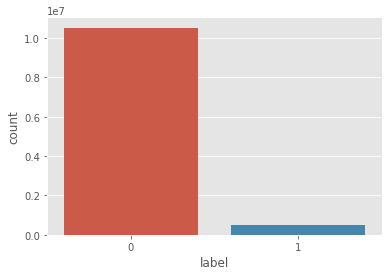

In [10]:
sns.countplot(x=df['label'])

# Scale Numerical Variables

In [11]:
num_var_cols = ['0','1','2','3','4','5','6','7','8']

df_scaled = df
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
df_scaled[num_var_cols] = scaler.fit_transform(df_scaled[num_var_cols])

In [12]:
df_scaled.head()

,transcript_id,transcript_position,nucleotides,0,1,2,3,4,5,6,7,8,gene_id,label
0,ENST00000000233,244,AAGACCA,0.011239,0.009548,0.649123,0.117647,0.050283,0.578164,0.075390,0.058543,0.281707,ENSG00000004059,0
1,ENST00000000233,244,AAGACCA,0.039294,0.011831,0.649123,0.049729,0.022461,0.627792,0.085258,0.033525,0.242683,ENSG00000004059,0
2,ENST00000000233,244,AAGACCA,0.025266,0.018581,0.448622,0.087575,0.058051,0.602978,0.032761,0.010845,0.226829,ENSG00000004059,0
3,ENST00000000233,244,AAGACCA,0.019605,0.009548,0.649123,0.048702,0.024112,0.677419,0.032761,0.019819,0.236585,ENSG00000004059,0
4,ENST00000000233,244,AAGACCA,0.042082,0.013725,0.586466,0.007335,0.018917,0.665012,0.111901,0.038148,0.258537,ENSG00000004059,0


In [13]:
df_scaled.shape

(11026934, 14)

In [14]:
#df_scaled.to_csv(os.path.join("../data", 'df_processed.csv'), index=False)

In [15]:
# groupby and agg using mean 

df2 = df_scaled.groupby(by = ['gene_id', 'transcript_id', 'transcript_position', 'nucleotides']).mean()
df2.reset_index(inplace=True)
df2.head()

,gene_id,transcript_id,transcript_position,nucleotides,0,1,2,3,4,5,6,7,8,label
0,ENSG00000000003,ENST00000373020,1006,TAGACCT,0.076611,0.014220,0.573338,0.073468,0.028919,0.640199,0.047666,0.020474,0.193380,0.0
1,ENSG00000000003,ENST00000373020,1013,AAAACTA,0.083471,0.011547,0.447368,0.032195,0.019652,0.338400,0.084399,0.017203,0.399573,0.0
2,ENSG00000000003,ENST00000373020,1149,GAAACAC,0.061091,0.016255,0.403053,0.046875,0.012664,0.293819,0.047670,0.010291,0.363137,0.0
3,ENSG00000000003,ENST00000373020,512,ATAACTC,0.047216,0.011003,0.170363,0.069807,0.011908,0.279963,0.067496,0.007901,0.382073,0.0
4,ENSG00000000003,ENST00000373020,689,TAAACAA,0.069356,0.009125,0.367108,0.041605,0.012177,0.279511,0.051872,0.011218,0.346167,0.0


# Train Test Split

In [16]:
TRAIN_PICKLE = os.path.join(DATA_DIR, "gtr.pickle")
TEST_PICKLE = os.path.join(DATA_DIR, "gte.pickle")

In [17]:
import pickle

with open(TRAIN_PICKLE, 'rb') as file1:
  train_gene_id = pickle.load(file1)

with open(TEST_PICKLE, 'rb') as file2:
  test_gene_id = pickle.load(file2)

In [18]:
unique_gene_ids = list(df2['gene_id'].unique())
gtr = unique_gene_ids[:int(0.8 * len(unique_gene_ids))]
gte = unique_gene_ids[int(0.8 * len(unique_gene_ids)):]

In [19]:
df_tr = df2.loc[df2['gene_id'].isin(gtr)]
df_te = df2.loc[df2['gene_id'].isin(gte)]

In [20]:
df_tr.shape, df_te.shape

((100972, 14), (20866, 14))

In [21]:
df_tr.head()

,gene_id,transcript_id,transcript_position,nucleotides,0,1,2,3,4,5,6,7,8,label
0,ENSG00000000003,ENST00000373020,1006,TAGACCT,0.076611,0.014220,0.573338,0.073468,0.028919,0.640199,0.047666,0.020474,0.193380,0.0
1,ENSG00000000003,ENST00000373020,1013,AAAACTA,0.083471,0.011547,0.447368,0.032195,0.019652,0.338400,0.084399,0.017203,0.399573,0.0
2,ENSG00000000003,ENST00000373020,1149,GAAACAC,0.061091,0.016255,0.403053,0.046875,0.012664,0.293819,0.047670,0.010291,0.363137,0.0
3,ENSG00000000003,ENST00000373020,512,ATAACTC,0.047216,0.011003,0.170363,0.069807,0.011908,0.279963,0.067496,0.007901,0.382073,0.0
4,ENSG00000000003,ENST00000373020,689,TAAACAA,0.069356,0.009125,0.367108,0.041605,0.012177,0.279511,0.051872,0.011218,0.346167,0.0


In [22]:
X_train = df_tr[['transcript_position', '0', '1', '2', '3', '4', '5', '6', '7', '8']]
y_train = df_tr['label']
X_test = df_te[['transcript_position', '0', '1', '2', '3', '4', '5', '6', '7', '8']]
y_test = df_te['label']

In [23]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((100972, 10), (100972,), (20866, 10), (20866,))

# Logistic Regression

In [24]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
y_pred_prob = log_model.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]
y_pred_prob

array([0.02345631, 0.08781438, 0.04273628, ..., 0.06976551, 0.04401803,
       0.01589511])

ROC AUC = 0.626
F1 = 0.000


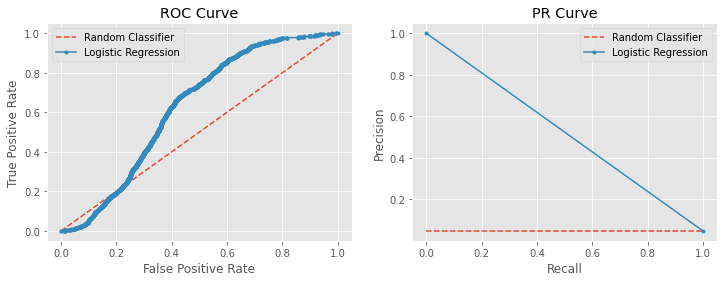

In [25]:
# evaluate predictions
roc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC = {roc:.3f}')
f1score = f1_score(y_test, y_pred)
print(f'F1 = {f1score:.3f}')


# create random classifier
rc_prob = [0 for _ in range(len(y_test))]

# roc curves
rc_fpr, rc_tpr, _ = roc_curve(y_test, rc_prob)
y_fpr, y_tpr, _ = roc_curve(y_test, y_pred_prob)

# pr curves
rc_precision, rc_recall, _ = precision_recall_curve(y_test, rc_prob)
y_precision, y_recall, _ = precision_recall_curve(y_test, y_pred)

# plot the roc curve for the model
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(rc_fpr, rc_tpr, linestyle='--', label='Random Classifier')
plt.plot(y_fpr, y_tpr, marker='.', label='Logistic Regression')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.subplot(1, 2, 2)
random_classifier = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [random_classifier, random_classifier], linestyle='--', label='Random Classifier')
plt.plot(y_recall, y_precision, marker='.', label='Logistic Regression')
plt.title('PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# show the plot
plt.show()